In [1]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns
#plt.rcParams["font.family"] = 'nanummyeongjo'
dbname="nmovie.db"
fontprop = fm.FontProperties(fname="malgun.ttf", size=12)


In [2]:
def seldb(tcode):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,POINT,TCODE 
        from movie 
        where TCODE='"""+str(tcode)+"""'
        order by IDX
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append(d[2])
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)
        
            

In [3]:
def seltitle():
    f=plt.figure(figsize=(10,400))
    
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select TIDX,TNAME from titles order by TIDX'
        data=cur.execute(sql).fetchall()
        i=0
        col=3
        total=len(data)
        row=divmod(total,col)[0]+1
        
        for d in data:
            gdata=seldb(d[0])
            #print('xdaga',gdata[0])
            if(len(gdata[0])>2):
                #print("*"*50)
                #print(d[1])
                #print("*"*50)
                pos=divmod(i,3)
                i+=1
                plt.subplot(row,col,i)
                #f.add_subplot(5,5,i)
                x_=gdata[0]
                y_=gdata[1]
                #y_=wx_+b
                A = np.vstack([x_,np.ones(len(x_))]).T
                w, b = np.linalg.lstsq(A, y_)[0] # 
                plt.plot(x_,y_,'ro' ,label="DATA")
                x_=np.asarray(gdata[0])
          
                plt.plot(x_,w*x_+b,'b',label="FIT")
                plt.legend()
                plt.title(d[1], fontproperties=fontprop)
              
            #print(d,end="\n")
        conn.commit()
        cur.close()
        plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


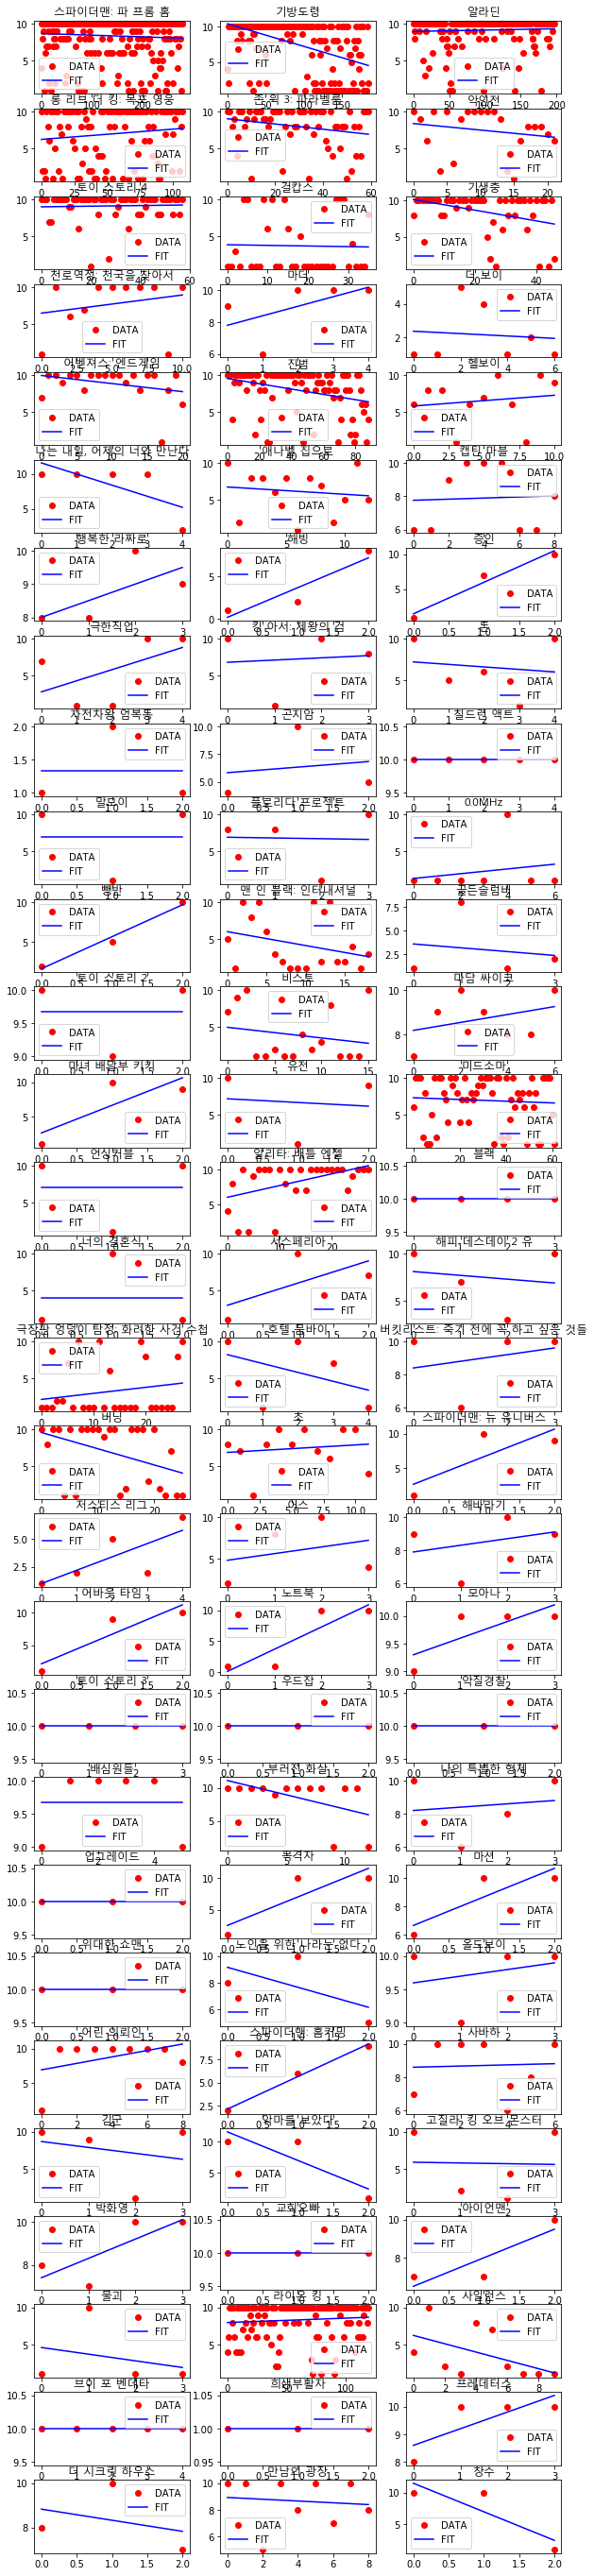

In [4]:
seltitle()